###ANSWER
(for making sure this gets removed)

### INSTRUCTOR CONTENT -- REMOVE THIS IN STUDENT VERSION
#### The goals for this class are:

* The first things students should do, if they didn't finish this in the last class period, is to get their forward Euler solution working.
* Once they have that working, they should try implementing the midpoints (RK2) method. This is the bare minimum goal for the assignment. If they don't have much time left once they get midpoint working, they should be encouraged to move on to the end of the assignment without implementing RK 4.
* Time permitting, they should see if they can also get the RK 4 method working.
* At the end of the assignment, the main goal is to have student experiment with the differences in the numerical solutions when they use the same time step for different methods. They should find that Euler requires a smaller time step to converge to the same solution as midpoint method or RK 4. They should also spend some time thinking about why they would use one method over another.

**IMPORTANT NOTE**: When this assignment was run for the first time during Fall 2019, students got really confused with the mathematical notation for Midpoint Method and the RK4 method. If one had the time, it would be useful to think about how to better represent the mathematics to simplify the implementation process.

### <p style="text-align: right;"> &#9989; Haoyan Lin</p>

#### <p style="text-align: right;"> &#9989;  Larissa Ford, Thanh lai, Connor Kromp, Dongdong Li</p>

# Day 8 In-Class Assignment: Modeling Disease with ODEs

<img src="https://slopefield.files.wordpress.com/2016/03/runge-kutta.png?w=663" width= 400><p style="text-align: right;">
</p>

## Learning Goals

- Finalize the algorithm for Euler's method
- Implement a higher order method
- Compare the solutions of each algorithm

## Assignment instructions

Today, *with your group*, you're going to continue the previous class activity and build a more sophisticated version of your model.

**This assignment is due at the end of class** and should be uploaded into the appropriate "In-class Assignments" dropbox folder on D2L.  Submission instructions can be found at the end of the notebook.

---
# Euler's Method

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/10/Euler_method.svg/220px-Euler_method.svg.png" width= 200><p style="text-align: right;">


In the space provided below, copy and paste your work from the previous class. 

If you were able to complete your algorithm for Euler's method, run the cell to make sure it is still behaving properly. Once the group is familiarized with everything again, move on to implementing the midpoint method.

If you were not able to complete your algorithm for Euler's method, continue working on it in this notebook until the group is finished.

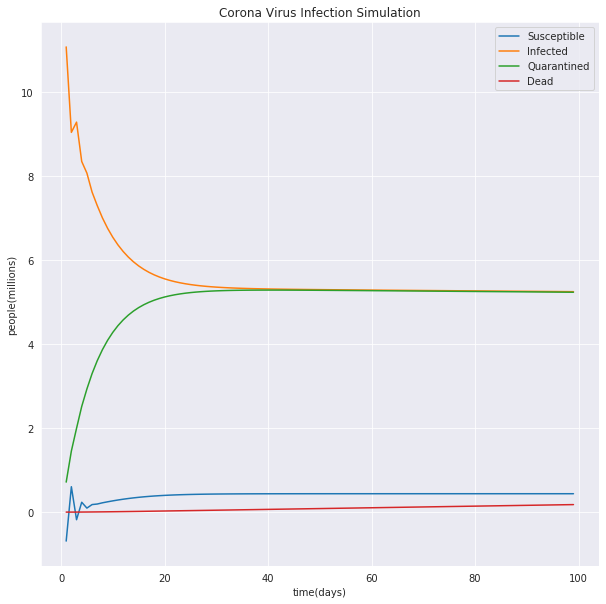

In [9]:
# paste your work from the previous class here

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

N = 1.1 # millions of people in wuhan
R0 = 2.5 # Basic reproduction rate
B = 0.179 # Basic reproduction number
s = (0.022/60) # death rate
r = (1/14) # recovery rate
g = (1/14) # quarantine rate

S = N
I = 10
Q = 0
D = 0

Slist = []
Ilist = []
Qlist = []
Dlist = []

time = np. arange(1,100)

for t in time:
    dSdt = -(B*I*S)/N + r * Q
    dIdt = (B*I*S)/ N -g*I
    dQdt = g* I -s* Q -r*Q
    dDdt = s* Q
    S = S + dSdt
    Slist.append(S)
    I = I +dIdt
    Ilist.append(I)
    Q = Q+ dQdt
    Qlist.append(Q)
    D = D+dDdt
    Dlist.append(D)
    
sns.set_style('dark')
plt.figure(figsize = (10,10))
plt.plot(time, Slist, label = 'Susceptible')
plt.plot(time, Ilist, label = 'Infected')
plt.plot(time, Qlist, label = 'Quarantined')
plt.plot(time, Dlist, label = 'Dead')
plt.title('Corona Virus Infection Simulation')
plt.xlabel('time(days)')
plt.ylabel('people(millions)')
plt.legend()
plt.grid()

# Midpoint Method

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/39/Midpoint_method_illustration.png/220px-Midpoint_method_illustration.png" width= 200>


In terms of difficulty, the [midpoint method](https://en.wikipedia.org/wiki/Midpoint_method) is the next level above Euler's method. If you recall, Euler's method is defined as

$$
y_{n+1} = y_n + dt*f(t_n, y_n)
$$

where the function $f$ is your ODE. The midpoint method is different in that it uses Euler's method to solve for a point that is halfway between $t_n$ and $t_{n+1}$ since the slope generated by that halfway point will yield a better approximation for the shape of the unknown curve. Once you have the slope, and location, of the halfway point you can use Euler's method *again* to get all the way to $y_{n+1}$. So, the midpoint method is defined as

$$
y_{n+1} = y_n + dt*f\Big(t_n + \frac{dt}{2}, y_n + \frac{dt}{2}f(t_n, y_n)\Big)
$$

where $f$ is your ODE. 

The value of using the midpoint method is that you are able to get to a more accurate solution without having to make your time step, dt, smaller. It can be implemented into code in the same fashion as Euler's method too! 

In [7]:
# Put your code here that implements a solution for your ODEs using the Midpoint Method
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

N = 1.1 # millions of people in wuhan
R0 = 2.5 # Basic reproduction rate
B = 0.179 # Basic reproduction number
s = (0.022/60) # death rate
r = (1/14) # recovery rate
g = (1/14) # quarantine rate

S = N
I = 10
Q = 0
D = 0

Slist = []
Ilist = []
Qlist = []
Dlist = []

time = np.arange(1,100)

yn+1=yn+dt*f(tn,yn)
yn+1=yn+dt*f(tn+dt2,yn+dt2f(tn,yn))



    
sns.set_style('dark')
plt.figure(figsize = (10,10))
plt.plot(time, Slist, label = 'Susceptible')
plt.plot(time, Ilist, label = 'Infected')
plt.plot(time, Qlist, label = 'Quarantined')
plt.plot(time, Dlist, label = 'Dead')
plt.title('Corona Virus Infection Simulation')
plt.xlabel('time(days)')
plt.ylabel('people(millions)')
plt.legend()
plt.grid()

SyntaxError: can't assign to operator (<ipython-input-7-d06ce67c443c>, line 28)

# Runge-Kutta Method (RK4)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/7e/Runge-Kutta_slopes.svg/800px-Runge-Kutta_slopes.svg.png" width= 400>



[RK4](https://en.wikipedia.org/wiki/Runge–Kutta_methods) is not as much a jump in difficulty as it is in complexity, which you may be able to guess from the image above. Utilizing both the Euler and Midpoint methods, RK4 is defined by,

$$
y_{n+1} = y_n + \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4)
$$

where,

$$
k_1 = dt*f(t_n,y_n)
\\
\\
k_2 = dt*f\Big(t_n + \frac{dt}{2},y_n + \frac{k_1}{2}\Big)
\\
\\
k_3 = dt*f\Big(t_n + \frac{dt}{2},y_n + \frac{k_2}{2}\Big)
\\
\\
k_4 = dt*f(t_n+dt,y_n+k_3)
$$

This method requires the same starting information, so your ODEs and an initial value for each of it's components.

**Important Note**: Only try coding up the RK4 method if you think you will have adequate time to get it working. Otherwise, move on to the next section!

In [ ]:
# Time permitting... put your code here that implements a solution for your ODEs using the RK4 method
k1=dt∗f(tn,yn)k2=dt∗f(tn+dt2,yn+k12)k3=dt∗f(tn+dt2,yn+k22)k4=dt∗f(tn+dt,yn+k3)

# Comparing the Methods

Now that you've constructed more than one algorithm for solving your set of ODEs, it's time to see how the results they yield differ. In the space provided below, create a graph that compares each set of solutions. 

Once you have your comparison graph set up, discuss your findings and answer the following questions:

- How drastic are the differences between the solutions? 
- Do the different solutions return identical results for the same time step? Why not?
- Is there a way to make the differences more noticeable? How?
- Is it always necessary to implement the most sophisticated method, or is it okay to use the basic Euler method in certain situations? What would those situations be?

In [ ]:
# Put your comparison code here


-----
### Congratulations, we're done!

Now, you just need to submit this assignment by uploading it to the course <a href="https://d2l.msu.edu/">Desire2Learn</a> web page for today's dropbox (Don't forget to add your name in the first cell).

&#169; Copyright 2019,  Michigan State University Board of Trustees